### The easy way

#### The Groups class
`ugropy` is kind of easy to use, but let's see what's has to offer.
Now let's start with the easy ways...

Let's use the `Groups` class to obtain the subgroups of all
the models supported by `ugropy`.

In [1]:
from ugropy import Groups

carvone = Groups("carvone")

carvone.unifac_groups

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}

Well, that was easy... `ugropy` uses
[`PubChemPy`](https://github.com/mcs07/PubChemPy) to access to pubchem and
obtain the SMILES representation of the molecule. ugropy uses the SMILES
representation and the [`rdkit`](https://github.com/rdkit/rdkit) library to
obtain the functional groups of the molecules.

The complete signature of the `Groups` class is the following:

In [2]:
carvone = Groups(
    identifier="carvone",
    identifier_type="name",
    normal_boiling_temperature=None
)

The identifier_type argument (default: "name") can be set to "name", "smiles"
or "mol".

When "name" is set, `ugropy` will use the identifier argument to search in
pubchem for the canonical SMILES of the molecule.

When "smiles" is set, `ugropy` uses it directly, this also means that the 
library will not suffer the overhead of searching on pubchem. Try it yourself:

In [3]:
carvone = Groups(
    identifier="CC1=CCC(CC1=O)C(=C)C",
    identifier_type="smiles",
    normal_boiling_temperature=None
)

carvone.unifac_groups

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}

If you are familiar with the `rdkit` library you will now that is a tone of
way to define a molecule (eg. SMILES, SMARTS, pdb file, InChIKey, etc). 
`ugropy` supports that you provide a Mol object from the `rdkit` library.

In [4]:
from rdkit import Chem

mol_obj = Chem.MolFromInchi("InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)10(11)6-9/h4,9H,1,5-6H2,2-3H3")

carvone = Groups(
    identifier=mol_obj,
    identifier_type="mol",
    normal_boiling_temperature=None
)

carvone.unifac_groups

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}

The current supported models are the classic liquid-vapor UNIFAC, Predictive
Soave-Redlich-Kwong (PSRK) and Joback. You can access the functional groups
this way:

In [5]:
carvone = Groups("carvone")

print(carvone.unifac_groups)

print(carvone.psrk_groups)

print(carvone.joback.groups)

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}
{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}
{'-CH3': 2, '=CH2': 1, '=C<': 1, 'ring-CH2-': 2, 'ring>CH-': 1, 'ring=CH-': 1, 'ring=C<': 1, '>C=O (ring)': 1}


You may notice that the joback attribute is and object. That's because 
is an Joback object, inside has all the properties that the Joback model can
estimate. This will be discoused later in the Joback tutorial, but an example:

In [6]:
carvone.joback.normal_boiling_point

516.47

Finally, the normal_boiling_temperature, if provided, parameter is used in the
Joback properties calculations instead of the Joback estimated normal boiling
temperature (see Joback tutorial).

The full documentation of the `Groups` class may be accessed by here.
Or you can do...

In [7]:
Groups?

Init signature:
Groups(
    identifier: str,
    identifier_type: str = 'name',
    normal_boiling_temperature: float = None,
) -> None
Docstring:     
Group class.

Stores the solved UNIFAC subgroups of a molecule.

Parameters
----------
identifier : str or rdkit.Chem.rdchem.Mol
    Identifier of a molecule (name, SMILES or Chem.rdchem.Mol). Example:
    hexane or CCCCCC.
identifier_type : str, optional
    Use 'name' to search a molecule by name, 'smiles' to provide the
    molecule SMILES representation or 'mol' to provide a
    rdkit.Chem.rdchem.Mol object, by default "name".
normal_boiling_temperature : float, optional
    If provided, will be used to estimate critical temperature, acentric
    factor, and vapor pressure instead of the estimated normal boiling
    point in the Joback group contribution model, by default None.

Attributes
----------
identifier : str
    Identifier of a molecule. Example: hexane or CCCCCC.
identifier_type : str, optional
    Use 'name' to search a m

If you are in an interactive environment you can do this cool thing thank to
`rdkit`.

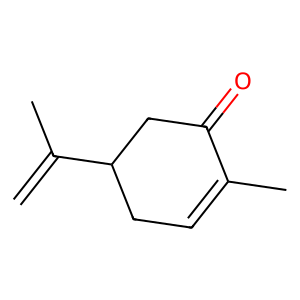

In [8]:
from rdkit.Chem import Draw

Draw.MolToImage(carvone.chem_object)

#### WARNING

For the UNIFAC, and PSRK groups the aldehyde group is change to HCO according
to the discussion: https://github.com/ClapeyronThermo/Clapeyron.jl/issues/225

This is more consistent with the ether groups and formate group.